<a href="https://colab.research.google.com/github/BKN1810/Machine-Learning/blob/master/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing Necessary Libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [4]:
# Load dataset into google colab sample_data folder from local drive
data = pd.read_csv('/content/sample_data/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
# Collecting X and Y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values
# print("X = ",X)
# print("Y = ",Y)

In [6]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
 
# Total number of values
n = len(X)

# Using the formula to calculate m and c
# y=mx+c
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    
m = numer / denom
c = mean_y - (m * mean_x)
 
# Print coefficients
print("m=",m,"c=", c)

m= 0.26342933948939945 c= 325.57342104944223


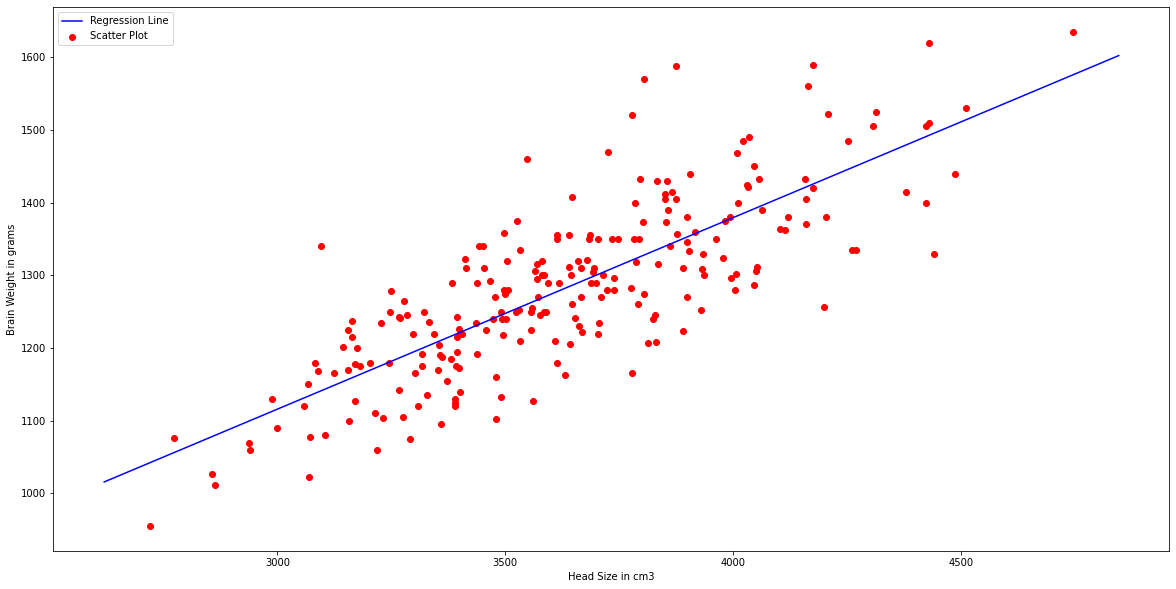

In [8]:
# Plotting Values and Regression Line
max_x = np.max(X) + 100
min_x = np.min(X) - 100
# print(max_x,min_x)


# Calculating line values x and y
x = np.linspace(min_x, max_x, num=10000)
y = c + m * x 
 
# Ploting Line
plt.plot(x, y, color='blue', label='Regression Line')

# Ploting Scatter Points
plt.scatter(X, Y, c='red', label='Scatter Plot')
 
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [9]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,consensus_score
from sklearn import metrics    
%matplotlib inline

In [11]:
# load Data set
boston=pd.read_csv('/content/sample_data/BostonHousing.csv')
# print("boston.shape ",boston.shape)
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
X=boston.iloc[:,1:14].values
y=boston.iloc[:,14].values

In [14]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)
print("xtrain shape : ", X_train.shape) 
print("xtest shape  : ", X_test.shape) 
print("ytrain shape : ", y_train.shape) 
print("ytest shape  : ", y_test.shape) 
 # print("xtrain : ", X_train) 

xtrain shape :  (303, 13)
xtest shape  :  (203, 13)
ytrain shape :  (303,)
ytest shape  :  (203,)


In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1)) # provided column as 1 but rows as unknown (-1)

In [17]:
# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# regression coefficients 
print('Coefficients: \n', regressor.coef_) 

#To retrieve the intercept:
print("\n Intercept: ",regressor.intercept_)
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(regressor.score(X_test, y_test))) 

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# min square error calculation
mse = metrics.mean_squared_error(y_test, y_pred) 
print("Mean Square Error : ", mse) 

Coefficients: 
 [[-0.08908683  0.17812497  0.03849947  0.06598503 -0.23054004  0.27298893
   0.00654531 -0.32694535  0.28113767 -0.2306827  -0.20341189  0.09593704
  -0.41713233]]

 Intercept:  [3.70065897e-15]
Variance score: -5.738100867063064
Mean Square Error :  608.5363708871537


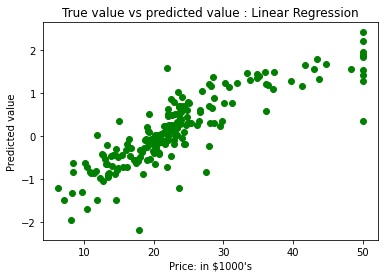

In [18]:
# Plotting Scatter graph to show the prediction  
# results - 'ytrue' value vs 'y_pred' value 
plt.scatter(y_test, y_pred, c = 'green') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 